In [5]:
import pandas as pd
import numpy as np

##### this is dataset of continouse numbers 

In [6]:
df = pd.read_csv(r'datasets\winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


In [7]:
pd.options.display.float_format = "{:,.2f}".format #it limitaiced the float upto two number after decimal

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### aim Is binary classification 
- try to set all values > 5.5 as 1 indicates that it is good product 
- and the the values < 0.5 as 0 indicates that it is not good product

In [11]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [12]:
# here we are saying that if the quality of drink is greater or equal to 5.5 replace that by 1
# and if the quality of drink is less then 5.5 replace that by 0
df.loc[df["quality"] <  5.5 , "quality"] = 0 
df.loc[df["quality"] >=  5.5 , "quality"] = 1

In [13]:
# now we have converted problem into binary classification 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,0
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,0
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,1
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,0


#### Separate Feature and Target Matrix

In [14]:

def get_seprate_features(df_id,col_id):
    #col_id is special col or target col b/c this the whole model is going to be created 
    global X, y
    X = df_id.drop(col_id,axis = 1) 
    y = df_id[col_id]
get_seprate_features(df,['quality'])

In [15]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40


In [16]:
y.head()

,quality
0,0
1,0
2,0
3,1
4,0


### Split Test and Train Data

In [17]:
from sklearn.model_selection import train_test_split
def get_train_test_split(array1, array2, test_size, random_state):
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(array1, array2, test_size=test_size,random_state=random_state)
get_train_test_split(X,y,0.2,0)

In [18]:
X_train.shape

(1279, 11)

In [19]:
y_train.shape

(1279, 1)

In [20]:
X_test.shape

(320, 11)

In [21]:
y_test.shape

(320, 1)

# Normalization 

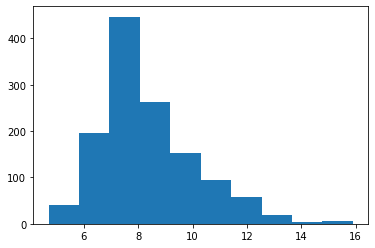

In [22]:
import matplotlib.pyplot as plt
plt.hist(X_train.iloc[:,0])
plt.show()
# this shows that our value are not normalized b/c on x-axis disturbunion start from 6 and end 16 a big variation b/w values

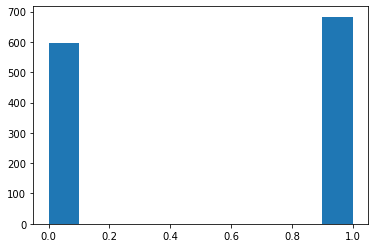

In [23]:
plt.hist(y_train)
plt.show()
# here little unequality 
# here it shows that quality of drink above equal to 5.5 are higher then the drinks whose quality are less 5.5

In [24]:
# normalization 
mean = X_train.mean(axis=0)
X_train -= mean

std = X_train.std(axis=0)
X_train /= std


X_test -= mean
X_test /= std
# the mean and std are vectors
# the reason to take mean and std of only X_train is that when we make prediction uusing the model at thst point we do not
#how calculate mean and std from new data so a true test of a model is how it does on unseen data using the parameters learn
#from the training data b/c we use all parameters that is learned by training set not from validation set    

In [25]:
print(f"mean:\n {mean} std:\n {std}")

mean:
 fixed acidity           8.34
volatile acidity        0.53
citric acid             0.27
residual sugar          2.55
chlorides               0.09
free sulfur dioxide    16.03
total sulfur dioxide   47.11
density                 1.00
pH                      3.31
sulphates               0.66
alcohol                10.41
dtype: float64 std:
 fixed acidity           1.73
volatile acidity        0.18
citric acid             0.20
residual sugar          1.45
chlorides               0.05
free sulfur dioxide    10.52
total sulfur dioxide   33.58
density                 0.00
pH                      0.15
sulphates               0.17
alcohol                 1.06
dtype: float64


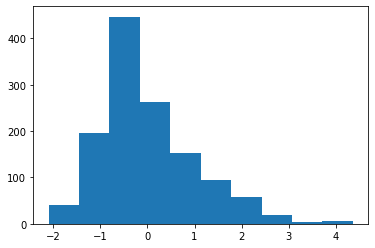

In [26]:
import matplotlib.pyplot as plt
plt.hist(X_train.iloc[:,0])
plt.show()
# this shows that our value are normalized b/c on x-axis disturbunion start from -2 and end 4 a small variation b/w values
# and most of values are in b/w of 1 to -1. 

### Building your network

In [28]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(11,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

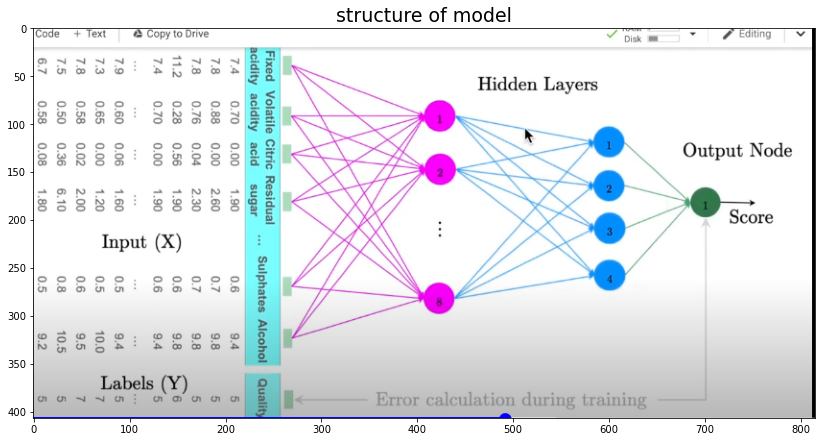

(407, 815, 3)

In [56]:
import matplotlib.pyplot as plt
import cv2
fig= plt.figure(figsize=(14,10))
file_name = r"img\binary.png"
image = cv2.imread(file_name)
plt.imshow(image)
plt.title('structure of model',size=19)
plt.show()
image.shape

### Summary

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


### Compile

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train, epochs=30, batch_size=10)

Epoch 1/30
128/128 [==============================] - 2s 2ms/step - loss: 0.7601 - accuracy: 0.5137
Epoch 2/30
128/128 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6615
Epoch 3/30
128/128 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.7037
Epoch 4/30
128/128 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.7295
Epoch 5/30
128/128 [==============================] - 0s 2ms/step - loss: 0.6035 - accuracy: 0.7303
Epoch 6/30
128/128 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.7435
Epoch 7/30
128/128 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.7451
Epoch 8/30
128/128 [==============================] - 0s 3ms/step - loss: 0.5242 - accuracy: 0.7506
Epoch 9/30
128/128 [==============================] - 0s 3ms/step - loss: 0.5169 - accuracy: 0.7514
Epoch 10/30
128/128 [==============================] - 0s 3ms/step - loss: 0.5128 - accuracy: 0.7545

### viz of loss and acc

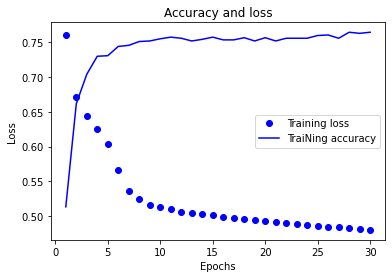

In [58]:
history_dict = history.history
loss = history.history['loss']
accuracy = history.history['accuracy']
"""print(loss)
print(accuracy)
print(epochs)"""
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, accuracy, 'b', label='TraiNing accuracy')
plt.title('Accuracy and loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() # here you see the on every epoch training accuracy is increased and traiNing loss is decreased 

In [32]:
print(history.params)

{'verbose': 1, 'epochs': 30, 'steps': 128}


In [37]:
train_loss, train_acc= model.evaluate(X_train, y_train)
print('train accuracy:', train_acc*100)
print('train loss:', train_loss*100)

40/40 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.7639
train accuracy: 76.38780474662781
train loss: 47.743213176727295


In [36]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc*100)
print('Test loss:', test_loss*100)

10/10 [==============================] - 0s 3ms/step - loss: 0.5060 - accuracy: 0.7500
Test accuracy: 75.0
Test loss: 50.5968451499939


In [38]:
X_test.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,1.42,-0.33,0.81,-0.31,1.76,1.04,0.56,0.77,-0.91,0.58,0.36
1032,-0.14,1.59,-1.39,1.06,0.17,-1.05,-0.99,0.95,0.33,-0.74,-0.77
1002,0.44,-1.31,0.30,-0.35,-0.50,-0.29,-0.60,-0.85,-0.32,1.03,1.21
487,1.07,0.63,0.45,-0.52,-0.71,-1.05,-0.99,0.77,-0.91,-1.37,-0.39
979,2.23,-0.44,1.11,-0.79,-0.25,-1.24,-1.22,0.08,-1.17,-0.17,-0.01


In [39]:
print(y_test.head(5))

      quality
1109        1
1032        0
1002        1
487         1
979         0


### prediction

In [40]:
pred = model.predict(X_test)

10/10 [==============================] - 0s 4ms/step


In [47]:
pred[:10]

array([[0.5553197 ],
       [0.25935632],
       [0.96888274],
       [0.10449178],
       [0.7005277 ],
       [0.2575701 ],
       [0.23057924],
       [0.8431957 ],
       [0.06912887],
       [0.31136447]], dtype=float32)

In [48]:
pred[:10].round() # all predictions are corrected 😎

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [44]:
y_test

,quality
1109,1
1032,0
1002,1
487,1
979,0
...,...
794,1
813,0
1322,0
704,0


In [45]:
len(pred)

320

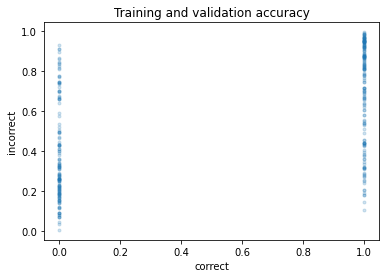

In [59]:
plt.plot(y_test['quality'], pred,'.', alpha=0.2)
plt.title('Training and validation accuracy')
plt.xlabel('correct')
plt.ylabel('incorrect')
plt.show()
# this show the variation in true and predicted value 